# Exploratory Data Analysis of "La Redoute" reviews data from TrustedShops

#### Required packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Import review data of La Redoute

In [36]:
file = "redoute.csv"
df = pd.read_csv(file, sep = ";", index_col = 0)
display(df.info())
display(df.head(15))




<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99 to rev-003b0375-d471-422d-8999-839333b657fe
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             34760 non-null  int64  
 1   title              27666 non-null  object 
 2   comment            27399 non-null  object 
 3   createdAt          34760 non-null  object 
 4   transaction        30737 non-null  object 
 5   updatedAt          32 non-null     float64
 6   totalLikeCount     8 non-null      float64
 7   customerCity       3189 non-null   object 
 8   SupplierReply      6801 non-null   object 
 9   SupplierReplyDate  6801 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


None

rating  \
id                                                 
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99       4   
rev-b54467c4-4769-42e3-a74a-c72c000059f9       4   
rev-b480f537-524e-491e-9f85-74405332c047       4   
rev-f04626f5-846d-41ca-9866-46573746f75b       4   
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb       5   
rev-f34fa049-56df-4ee6-85b4-b3b253ce848b       4   
rev-d5e0a0e8-66fd-437b-aa8c-df0bf351a0c8       4   
rev-369409f1-059e-46cc-83bb-37c674eb60af       4   
rev-bf224541-4807-4dcd-aa35-d034e4edd427       5   
rev-b13e3d11-8350-4f94-a7ff-f91fccbd7015       5   
rev-30ee3732-61df-4fee-a068-f6d0f27ec917       5   
rev-b08c424f-8039-4d8f-a603-8571286a1ab1       4   
rev-d9d5a74c-23b6-43c5-84f7-56d04faa776d       4   
rev-b349be09-2af1-4e3b-8d4c-ea2f96c7552f       5   
rev-8caf7331-787f-443f-be09-395554253178       5   

                                                                                      title  \
id                                                                                            
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99                                            Facilte   
rev-b54467c4-4769-42e3-a74a-c72c000059f9            Jolie table mais plus pour 6 que pour 8   
rev-b480f537-524e-491e-9f85-74405332c047           Achat d'un canapé La Redoute intérieurs…   
rev-f04626f5-846d-41ca-9866-46573746f75b  excellent  site mais des changements qui compl...   
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb  Comme d'habitude, aucun souci et rapidité d'ex...   
rev-f34fa049-56df-4ee6-85b4-b3b253ce848b          Bon commerçant, mais et l'environnement ?   
rev-d5e0a0e8-66fd-437b-aa8c-df0bf351a0c8                Beaucoup de facilité pour commander   
rev-369409f1-059e-46cc-83bb-37c674eb60af  A quoi bon choisir un point de livraison si La...   
rev-bf224541-4807-4dcd-aa35-d034e4edd427              Achat de vêtements en ligne facile à…   
rev-b13e3d11-8350-4f94-a7ff-f91fccbd7015  Révision des couleurs représentées par les mac...   
rev-30ee3732-61df-4fee-a068-f6d0f27ec917                                    FELICITATIONS !   
rev-b08c424f-8039-4d8f-a603-8571286a1ab1                                  Montage du meuble   
rev-d9d5a74c-23b6-43c5-84f7-56d04faa776d                    J'ai tout aimé comme d'habitude   
rev-b349be09-2af1-4e3b-8d4c-ea2f96c7552f             J'ai aimé la disponibilité du produit…   
rev-8caf7331-787f-443f-be09-395554253178                    J’étais septique en l’achetant…   

                                                                                    comment  \
id                                                                                            
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99  Facilte, sollicitations dosées...qualité..on p...   
rev-b54467c4-4769-42e3-a74a-c72c000059f9  Livraison impeccable avec possibilité de prend...   
rev-b480f537-524e-491e-9f85-74405332c047  Achat d'un canapé La Redoute intérieurs le 6/9...   
rev-f04626f5-846d-41ca-9866-46573746f75b  je commande depuis longtemps chez la redoute; ...   
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb  Comme d'habitude, aucun souci et rapidité d'ex...   
rev-f34fa049-56df-4ee6-85b4-b3b253ce848b  Bon prix, produit expédié rapidement et reçu r...   
rev-d5e0a0e8-66fd-437b-aa8c-df0bf351a0c8  Beaucoup de facilité pour commander. Descripti...   
rev-369409f1-059e-46cc-83bb-37c674eb60af  Cela fait plusieurs fois que La Redoute envoie...   
rev-bf224541-4807-4dcd-aa35-d034e4edd427  Achat de vêtements en ligne facile à faire, le...   
rev-b13e3d11-8350-4f94-a7ff-f91fccbd7015  Le site la Redoute est sûr, d'autant plus que ...   
rev-30ee3732-61df-4fee-a068-f6d0f27ec917  Les articles proposés sont de bonne qualité et...   
rev-b08c424f-8039-4d8f-a603-8571286a1ab1  Commande, suivi, délais, livraison.... bons.\n...   
rev-d9d5a74c-23b6-43c5-84f7-56d04faa776d  J'ai tout aimé comme d'habitude, simplicité et...   
rev-b349be09-2af1-4e3b-8d4c-ea2f96c7552f  J'ai aimé la disponibilité du produit commandé...   
rev-8caf7331-787f-443

### Remove irrelevent features : "title","totalLikeCount", "customerCity","updatedAt"

In [37]:
df['updatedAt'].isna().sum()
df = df.drop(["title","totalLikeCount", "customerCity","updatedAt" ], axis = 1).reset_index()
df.head()


id  rating  \
0  rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99       4   
1  rev-b54467c4-4769-42e3-a74a-c72c000059f9       4   
2  rev-b480f537-524e-491e-9f85-74405332c047       4   
3  rev-f04626f5-846d-41ca-9866-46573746f75b       4   
4  rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb       5   

                                             comment            createdAt  \
0  Facilte, sollicitations dosées...qualité..on p...  2023-10-05 14:18:42   
1  Livraison impeccable avec possibilité de prend...  2023-10-02 13:08:27   
2  Achat d'un canapé La Redoute intérieurs le 6/9...  2023-09-18 16:52:21   
3  je commande depuis longtemps chez la redoute; ...  2023-10-13 08:57:16   
4  Comme d'habitude, aucun souci et rapidité d'ex...  2023-09-21 11:09:15   

  transaction SupplierReply SupplierReplyDate  
0  2023-09-23           NaN               NaN  
1  2023-09-11           NaN               NaN  
2  2023-09-06           NaN               NaN  
3  2023-10-02           NaN               NaN  
4  2023-09-15           NaN               NaN

####  Remove lines without comments

In [38]:
df = df.dropna(subset = ["comment"])
df = df.dropna(subset = ['SupplierReply'])

In [39]:
display(df.info())
display(df.head())
display(df['SupplierReply'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 5806 entries, 64 to 34750
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5806 non-null   object
 1   rating             5806 non-null   int64 
 2   comment            5806 non-null   object
 3   createdAt          5806 non-null   object
 4   transaction        4861 non-null   object
 5   SupplierReply      5806 non-null   object
 6   SupplierReplyDate  5806 non-null   object
dtypes: int64(1), object(6)
memory usage: 362.9+ KB


None

id  rating  \
64   rev-0134d691-cf06-4caa-8d42-528cea655fa2       4   
77   rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817       4   
78   rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8       4   
95   rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4       4   
117  rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2       4   

                                               comment            createdAt  \
64   Une livraison assez rapide, les tailles sont b...  2023-10-06 18:09:56   
77   Juste vous dire que la qualité est inférieure ...  2023-10-05 14:37:16   
78   Vendeur et vendeuse au top dans le magasin Gal...  2023-10-04 14:38:55   
95   M'ayant été signalé que mon colis ne pouvait ê...  2023-09-23 08:12:33   
117  J'apprécie la redoute pour sa fiabilité et son...  2023-10-09 20:25:34   

    transaction                                      SupplierReply  \
64   2023-09-23  Bonjour, merci pour vos encouragements. Vos re...   
77   2023-09-29  Bonjour, merci d'avoir pris le temps de nous p...   
78   2023-09-23  Bonjour, merci de nous partager votre expérien...   
95   2023-09-17  Bonjour, merci d'avoir pris le temps de partag...   
117  2023-10-03  Bonjour, merci d'avoir pris le temps de nous p...   

       SupplierReplyDate  
64   2023-10-13 09:56:10  
77   2023-10-12 10:01:19  
78   2023-10-11 12:42:01  
95   2023-10-09 13:43:27  
117  2023-10-16 12:03:29

SupplierReply
Bonjour, nous avons tenté de vous joindre sans succès. Afin de trouver une solution ensemble, je vous invite à vous rendre dans la rubrique Contact du site (qui se trouve dans notre footer ou via notre moteur de recherche) ou en copiant/collant dans votre navigateur l’adresse URL suivante: https://www.laredoute.fr/espace-contact-conseiller.aspx. Loubna de l’équipe Service Client.         306
Bonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.    192
Bonjour, merci d’avoir pris le temps de témoigner de votre expérience ! Vos remarques nous aident à nous améliorer . À très vite ! Wassim de l'équipe Service Client                                

In [40]:
# Conversion du format 

# Converssion  des colonnes en datetime en utilisant le format spécifié
df['transaction'] = pd.to_datetime(df['transaction'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['createdAt'] = pd.to_datetime(df['createdAt'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['SupplierReplyDate'] = pd.to_datetime(df['SupplierReplyDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# identification des lignes avec des valeurs NaN dans la colonne 'transaction'
nan_rows = df[df['transaction'].isna()]

# Affichez les lignes avec des valeurs NaN dans la colonne 'transaction'
print(nan_rows)

                                             id  rating  \
64     rev-0134d691-cf06-4caa-8d42-528cea655fa2       4   
77     rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817       4   
78     rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8       4   
95     rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4       4   
117    rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2       4   
...                                         ...     ...   
34733  rev-b5505114-5d04-40bd-89e2-62743a33b3f9       2   
34734  rev-61cdd035-b274-41b7-a0b8-8343b2796a70       2   
34737  rev-371e91c1-bdc7-419e-9a9b-460b639ca939       2   
34745  rev-8a7f50cb-9bc7-4071-901e-2bbe734ff9a5       3   
34749  rev-4818ee79-c2b7-458c-8772-306544562fe9       2   

                                                 comment           createdAt  \
64     Une livraison assez rapide, les tailles sont b... 2023-10-06 18:09:56   
77     Juste vous dire que la qualité est inférieure ... 2023-10-05 14:37:16   
78     Vendeur et vendeuse au top dans le magasin G

In [41]:
df.drop('transaction',axis=1,inplace=True)

In [42]:
#Vue d'ensemble des données
df.head(18)


id  rating  \
64   rev-0134d691-cf06-4caa-8d42-528cea655fa2       4   
77   rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817       4   
78   rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8       4   
95   rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4       4   
117  rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2       4   
126  rev-e3e0c70f-ba7d-4ab1-856c-fab521200c1b       4   
172  rev-3d66e3f3-e22c-4e3c-a236-12e97f9b3dfe       4   
173  rev-79de8ba5-6963-4095-bbcf-655e22e6ed67       4   
183  rev-217b0185-fcf2-4ef8-8851-7a049f77f164       4   
189  rev-711159db-8cf0-445d-b959-17aa34f5da92       4   
194  rev-6b8bac53-8521-468b-98f6-c69dbf36428f       4   
223  rev-e4f3cda8-81f0-42ea-81cf-51a6e1dd3aa8       4   
224  rev-98bb674c-2649-4948-ae97-44e71559ff81       4   
249  rev-304d4956-0a0e-452d-aa34-7064c96d3709       4   
311  rev-e2549267-b7a5-433d-9f50-979a94c18e7f       4   
318  rev-ba2ed17b-2b78-4bca-9119-5ae338f76de0       4   
390  rev-b17b7363-808c-4740-a4bb-cf313c9b77ce       4   
438  rev-5c66235f-001b-459f-a5dd-42d8ab800957       4   

                                               comment           createdAt  \
64   Une livraison assez rapide, les tailles sont b... 2023-10-06 18:09:56   
77   Juste vous dire que la qualité est inférieure ... 2023-10-05 14:37:16   
78   Vendeur et vendeuse au top dans le magasin Gal... 2023-10-04 14:38:55   
95   M'ayant été signalé que mon colis ne pouvait ê... 2023-09-23 08:12:33   
117  J'apprécie la redoute pour sa fiabilité et son... 2023-10-09 20:25:34   
126  J'ai apprécié la disponibilité des articles et... 2023-10-04 16:10:06   
172  rapidité du traitement de ma commande \nmais q... 2023-09-25 13:59:53   
173  J'ai commandé un trench court. Je l'ai reçu ta... 2023-09-23 07:37:47   
183  Un vendeur compétent qui percute vite et bien ... 2023-10-05 18:19:08   
189  J'ai aimé la rapidité de livraison. Le choix d... 2023-09-29 13:59:22   
194  Cliente depuis des années voir décennies 🤭\nJe... 2023-09-30 09:57:45   
223  Délai de réception plus rapide qu'avant et jud... 2023-09-29 16:15:36   
224  Rapidité pour trouver les articles souhaités, ... 2023-10-06 16:14:58   
249  Les modèles et la coupe sont bien , il y a du ... 2023-10-06 17:32:25   
311  les +: La rapidité de la livraison, la qualité... 2023-10-04 12:09:08   
318  Pour la livraison c’est très bien on est vite ... 2023-09-29 16:13:48   
390  Commande qui est arrivée en 2 colis avec un jo... 2023-09-23 12:58:16   
438  Recommancez à travailler avec Mondial Relay et... 2023-09-23 07:17:14   

                                         SupplierReply   SupplierReplyDate  
64   Bonjour, merci pour vos encouragements. Vos re... 2023-10-13 09:56:10  
77   Bonjour, merci d'avoir pris le temps de nous p... 2023-10-12 10:01:19  
78   Bonjour, merci de nous partager votre expérien... 2023-10-11 12:42:01  
95   Bonjour, merci d'avoir pris le temps de partag... 2023-10-09 13:43:27  
117  Bonjour, merci d'avoir pris le temps de nous p... 2023-10-16 12:03:29  
126  Bonjour, merci pour vos encouragements. Vos re... 2023-10-11 11:54:40  
172  Bonjour, merci d'avoir pris le temps de nous p... 2023-10-10 12:17:34  
173  Bonjour, merci d'avoir pris le temps de partag... 2023-10-09 13:25:22  
183  Bonjour, merci de nous partager votre expérien... 2023-10-13 15:30:08  
189  Bonjour, merci pour vos encouragements. Vos re... 2023-10-10 15:43:28  
194  Bonjour, merci de l'intérêt que vous portez à ... 2023-10-11 09:03:28  
223  Bonjour, merci de nous partager votre expérien... 2023-10-11 08:49:20  
224  Bonjour, merci de nous partager votre expérien... 2023-10-13 06:51:53  
249  Bonjour, merci de nous partager votre expérien... 2023-10-13 08:55:12  
311  Bonjour, merci d'avoir pris le temps de partag... 2023-10-11 14:36:16  
318  Bonjour, merci pour vos encouragements. Vos re... 2023-10-11 08:10:33  
390  Bonjour, merci d'avoir pris le temps de partag... 2023-10-09 15:55:44  
438  Bonjour, merci d'avoir pris le temps de partag... 2023-10-09 13:14:05

In [43]:
# Statistiques descriptives de la colonne 'rating'
print(df['rating'].describe())

count    5806.000000
mean        2.915949
std         1.144886
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


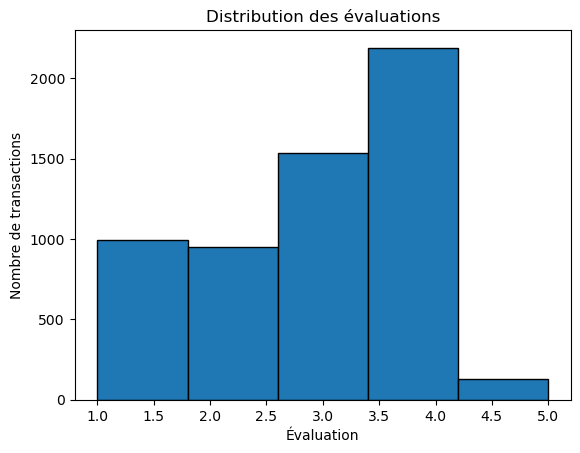

In [44]:
# Distribution des évaluations (ratings) 

plt.hist(df['rating'], bins=5, edgecolor="k")
plt.title('Distribution des évaluations')
plt.xlabel('Évaluation')
plt.ylabel('Nombre de transactions')
plt.show()


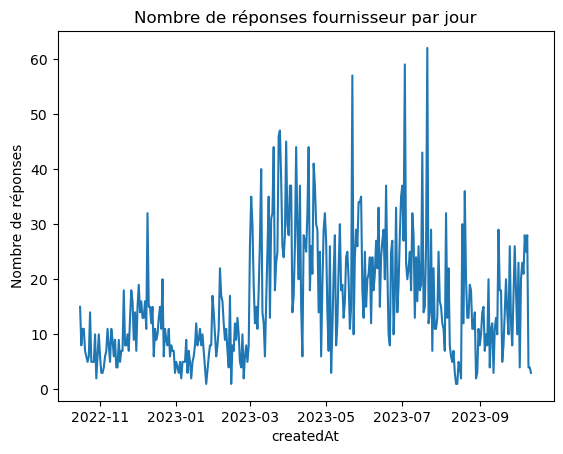

In [45]:
# Nombre total de réponses fournisseur par jour

df.groupby(df['createdAt'].dt.date).size().plot(kind='line', title="Nombre de réponses fournisseur par jour")
plt.ylabel('Nombre de réponses')
plt.show()


In [46]:
# Délai moyen entre la création et la réponse du fournisseur 

df['Delay'] = (df['SupplierReplyDate'] - df['createdAt']).dt.days
average_delay = df['Delay'].mean()
print(f"Délai moyen de réponse : {average_delay:.2f} jours")


Délai moyen de réponse : 6.62 jours


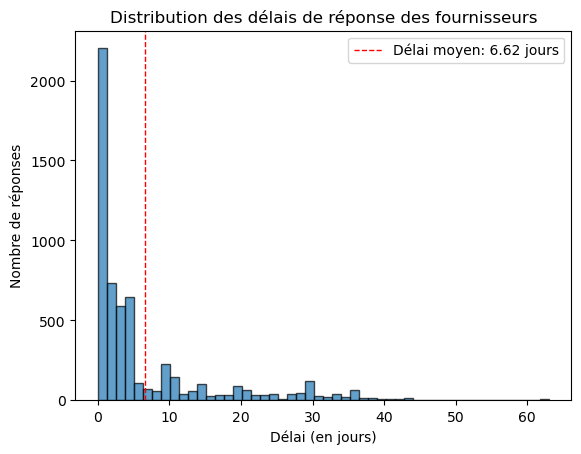

In [47]:
# Histogramme pour visualiser la distribution du délai entre la création 
# et la réponse du fournisseur 

plt.hist(df['Delay'], bins=50, edgecolor="k", alpha=0.7)
plt.axvline(average_delay, color='red', linestyle='dashed', linewidth=1, label=f'Délai moyen: {average_delay:.2f} jours')
plt.title('Distribution des délais de réponse des fournisseurs')
plt.xlabel('Délai (en jours)')
plt.ylabel('Nombre de réponses')
plt.legend()
plt.show()



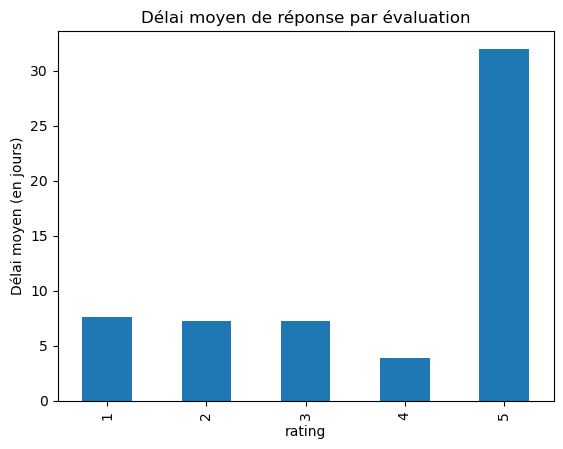

In [48]:
# Délai de réponse en fonction de l'évaluation

delay_by_rating = df.groupby('rating')['Delay'].mean()
delay_by_rating.plot(kind='bar', title="Délai moyen de réponse par évaluation")
plt.ylabel('Délai moyen (en jours)')
plt.show()


In [49]:
# Délai le plus court, le plus long et le délai médian entre la création et la réponse du fournisseur

min_delay = df['Delay'].min()
max_delay = df['Delay'].max()
median_delay = df['Delay'].median()

print(f"Délai le plus court : {min_delay} jours")
print(f"Délai le plus long : {max_delay} jours")
print(f"Délai médian : {median_delay} jours")



Délai le plus court : 0 jours
Délai le plus long : 63 jours
Délai médian : 2.0 jours


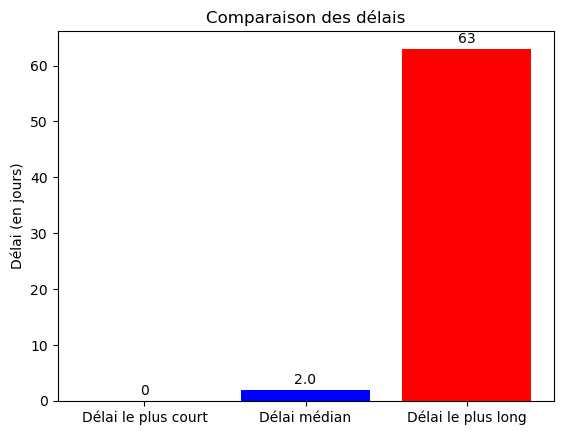

In [50]:
# Barre verticale pour visualiser le délai le plus court, le plus long et 
#le délai médian 

delays = [min_delay, median_delay, max_delay]
names = ["Délai le plus court", "Délai médian", "Délai le plus long"]

plt.bar(names, delays, color=['green', 'blue', 'red'])
plt.title("Comparaison des délais")
plt.ylabel("Délai (en jours)")
for i, v in enumerate(delays):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()



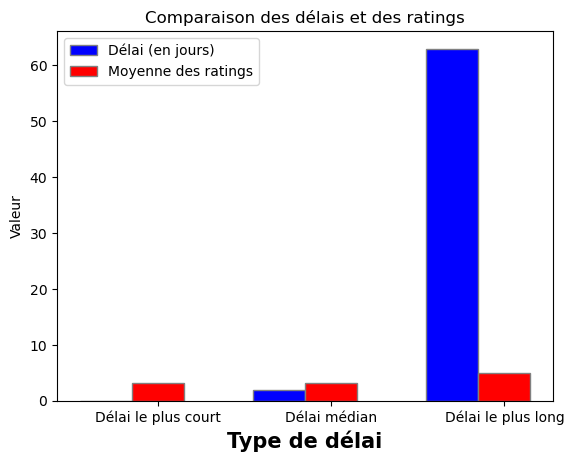

In [51]:
# Calculer les moyennes des notations pour les transactions ayant le délai le plus court, 
# le délai médian et le délai le plus long :
rating_min_delay = df[df['Delay'] == min_delay]['rating'].mean()
rating_median_delay = df[df['Delay'] == median_delay]['rating'].mean()
rating_max_delay = df[df['Delay'] == max_delay]['rating'].mean()

# Position des groupes sur l'axe X
barWidth = 0.3
r1 = np.arange(len(delays))
r2 = [x + barWidth for x in r1]

plt.bar(r1, delays, color='blue', width=barWidth, edgecolor='grey', label='Délai (en jours)')
plt.bar(r2, [rating_min_delay, rating_median_delay, rating_max_delay], color='red', width=barWidth, edgecolor='grey', label='Moyenne des ratings')

# Ajout des titres et labels
plt.title('Comparaison des délais et des ratings')
plt.xlabel('Type de délai', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(delays))], ['Délai le plus court', 'Délai médian', 'Délai le plus long'])
plt.ylabel('Valeur')

# Créer une légende
plt.legend()
plt.show()


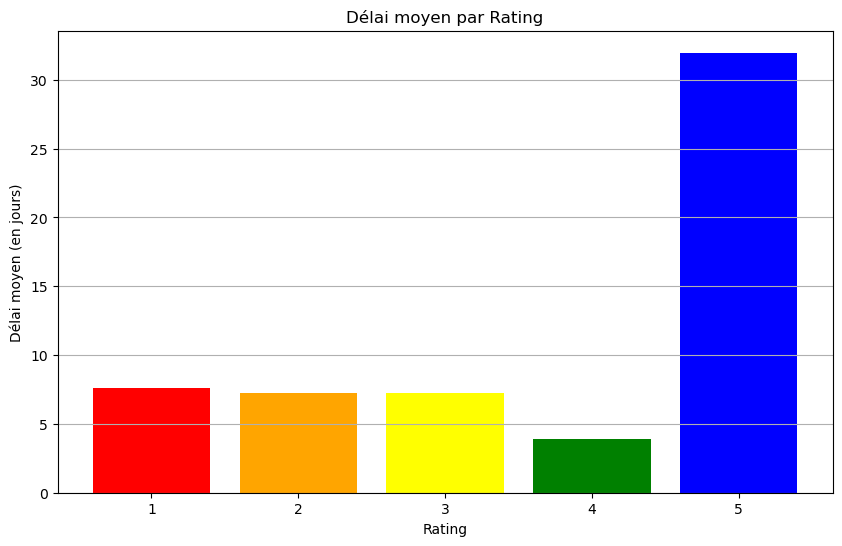

In [52]:
# Calculer le délai moyen pour chaque rating
grouped = df.groupby('rating')['Delay'].mean().reset_index()

# Visualiser les résultats avec un graphique à barres

plt.figure(figsize=(10, 6))
plt.bar(grouped['rating'], grouped['Delay'], color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Délai moyen par Rating')
plt.xlabel('Rating')
plt.ylabel('Délai moyen (en jours)')
plt.xticks(grouped['rating'])
plt.grid(axis='y')
plt.show()


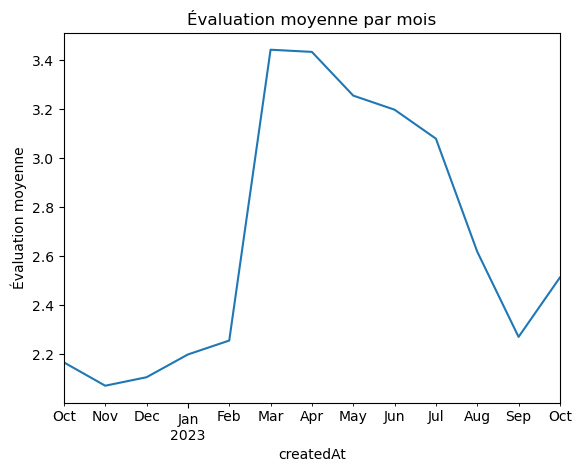

In [53]:
# Répartition mensuelle des évaluations 

df.groupby(df['createdAt'].dt.to_period("M"))['rating'].mean().plot(kind='line', title="Évaluation moyenne par mois")
plt.ylabel('Évaluation moyenne')
plt.show()





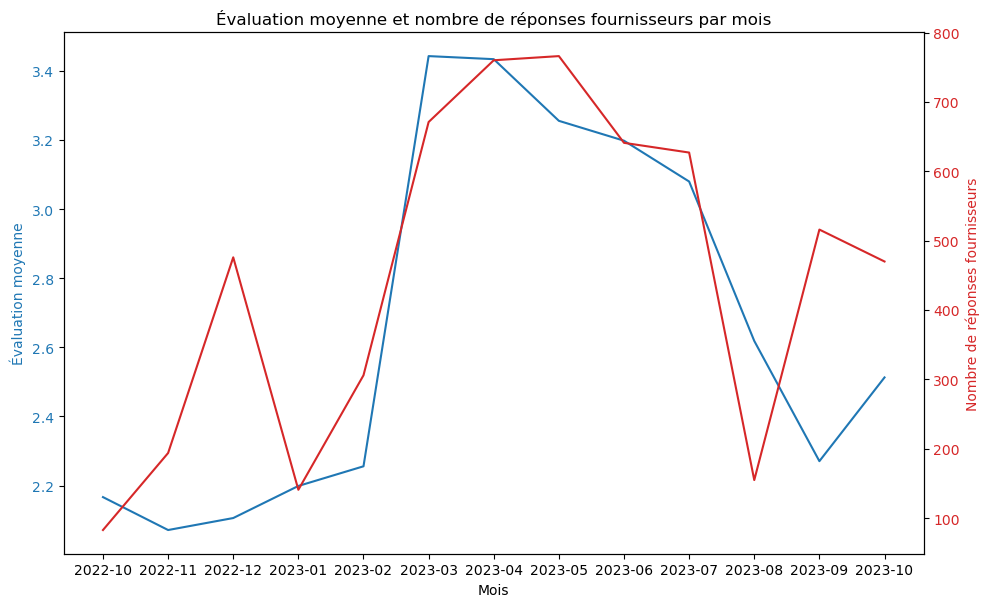

In [54]:
# Calcul de l'évaluation moyenne par mois
ratings_per_month = df.groupby(df['createdAt'].dt.to_period("M"))['rating'].mean()

# Calcul du nombre de réponses fournisseurs par mois:
supplier_replies_per_month = df.groupby(df['SupplierReplyDate'].dt.to_period("M")).size()

# Visualiser les deux series sur le meme graphique:

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Évaluation moyenne', color=color)
ax1.plot(ratings_per_month.index.astype(str), ratings_per_month.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Nombre de réponses fournisseurs', color=color)  
ax2.plot(supplier_replies_per_month.index.astype(str), supplier_replies_per_month.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Évaluation moyenne et nombre de réponses fournisseurs par mois')
plt.show()



In [55]:
# Etude de la variation de la note en fonction du type de réponse prédéfinie(SupplierReply), 
# nous souhaitons effectuer une analyse statistique et de visualisation pour voir 
# s'il existe une relation ou une corrélation entre les deux.

In [56]:
# Agregation des 'SupplierReply'

avg_ratings = df.groupby('SupplierReply')['rating'].mean().sort_values(ascending=False)

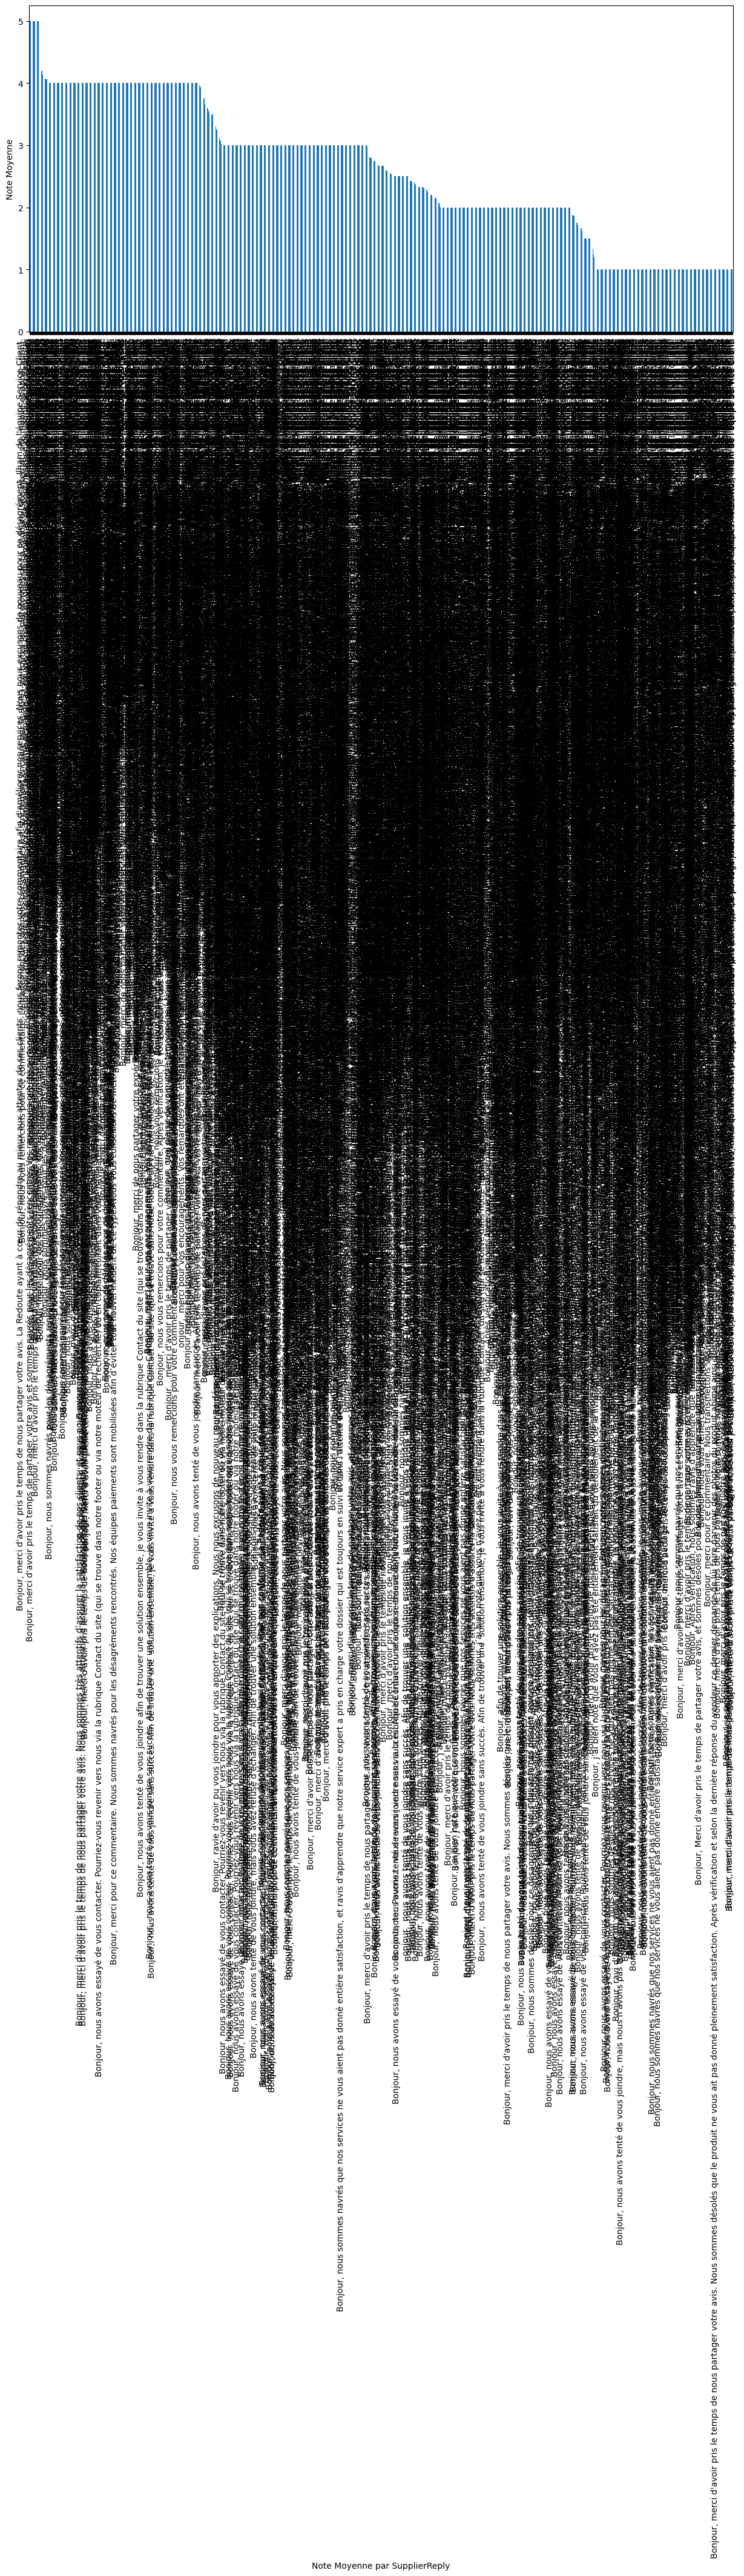

In [57]:
# Visualisation
import matplotlib.pyplot as plt
avg_ratings.plot(kind='bar', figsize=(15,7))
plt.ylabel('Note Moyenne')
plt.xlabel('Note Moyenne par SupplierReply')
plt.show()


In [ ]:
# Tests statistiques 

In [ ]:
# Preambule verifications des suppositions
# 1/ homogeneite des variances
# 2/ normalite des residus

In [28]:
# 1/ homogeneite des variances / Test de Levene
from scipy.stats import levene
# Liste pour stocker les groupes de notes
groups = [df['rating'][df['SupplierReply'] == reply] for reply in df['SupplierReply'].unique()]
# Test de Levene
statistic, p_value = levene(*groups)
print(f'Statistique: {statistic}')
print(f'P-valeur: {p_value}')


Statistique: 1.72604153619374
P-valeur: 1.093552110575327e-38


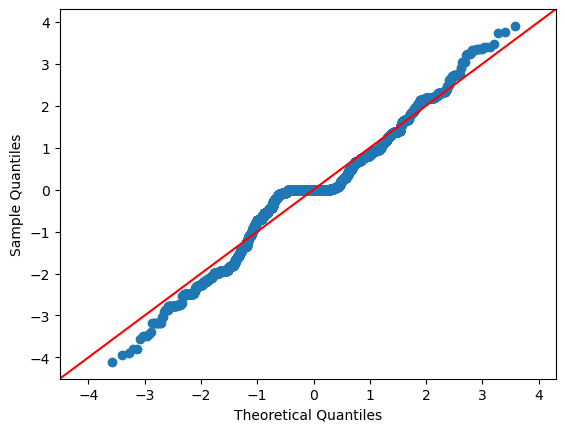

In [30]:
# 2/ Normalite des residus
# Graphiquement - à l'aide d'un QQ-plot

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

model = ols('rating ~ C(SupplierReply)',data=df).fit()
residus = model.resid
sm.qqplot(residus, fit=True, line="45")
plt.show()


In [58]:
# Analyse Test de Levene
# l'hypothèse nulle est que l'échantillon provient 
# d'une population normalement distribuée
# Ici la p-valeur presque nulle balaye l'hypothese H0

# Analyse du QQPlot
# Sur le graphique, la majorité des points suivent la ligne rouge 
# (la ligne théorique pour une distribution normale),
#mais il y a une déviation notable aux deux extrémités. 
#Cela suggère une certaine déviation de la normalité, 
# en particulier pour les valeurs extrêmes



###  Utilisation de methodes de  transformation de données  



In [59]:
#importation des packages
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro


### Transformation logarithmique

In [60]:
df['rating_log']= np.log(df['rating'])

### Representation graphique du QQplot 

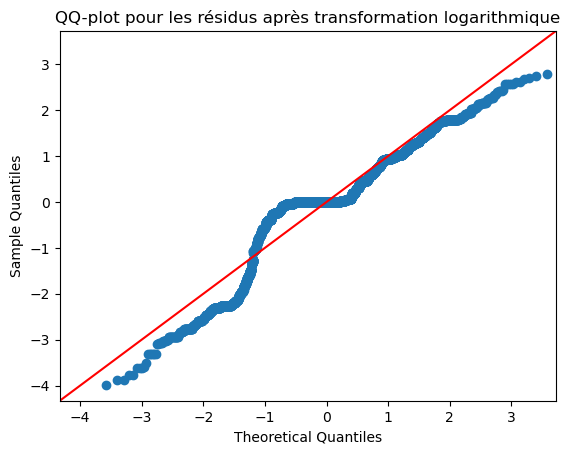

In [61]:
# Modèle OLS avec la nouvelle variable transformée
model_log = ols('rating_log ~ C(SupplierReply)', data=df).fit()
residus_log = model_log.resid

# QQ-plot pour les résidus après transformation logarithmique
sm.qqplot(residus_log, fit=True, line="45")
plt.title('QQ-plot pour les résidus après transformation logarithmique')
plt.show()


### test Shapiro-Wilk

In [62]:
# Test de Shapiro-Wilk pour les résidus après transformation logarithmique
statistique, p_valeur = shapiro(residus_log)
print(f"Statistique: {statistique}")
print(f"P-valeur: {p_valeur}")

Statistique: 0.8845541477203369
P-valeur: 0.0


C:\Users\Mike\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Transformation de Box-Cox

In [63]:
from scipy.stats import boxcox, shapiro, probplot

df['rating_boxcox'], lambda_value = boxcox(df['rating'])



In [64]:
# Afficher la valeur de lambda
print(f'Valeur de Lambda pour la transformation Box-Cox: {lambda_value}')


Valeur de Lambda pour la transformation Box-Cox: 1.264819171955885


### QQ-plot pour les données transformées


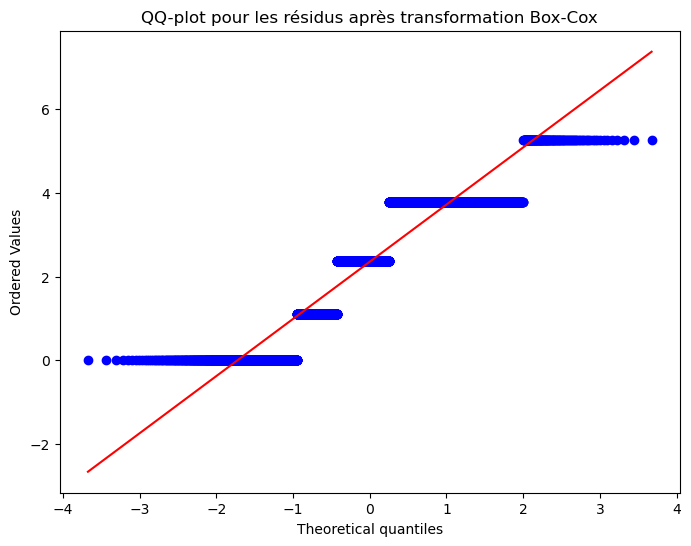

In [65]:
plt.figure(figsize=(8, 6))
probplot(df['rating_boxcox'], plot=plt)
plt.title('QQ-plot pour les résidus après transformation Box-Cox')
plt.show()

### Test de Shapiro-Wilk pour les données transformées



In [67]:
stat, p = shapiro(df['rating_boxcox'])
print(f'Statistique: {stat}')
print(f'P-valeur: {p}')


Statistique: 0.8626744747161865
P-valeur: 0.0


## Detection et traitement des valeurs aberrantes

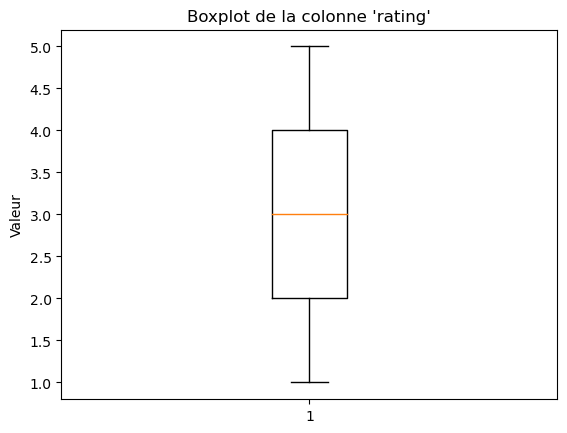

In [69]:
# Visualisation des données
plt.boxplot(df['rating'])
plt.title("Boxplot de la colonne 'rating'")
plt.ylabel("Valeur")
plt.show()


In [70]:
# Calcul de l'IQR
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1


In [71]:
# Définition des seuils pour les valeurs aberrantes
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes
outliers = df[(df['rating'] < lower_threshold) | (df['rating'] > upper_threshold)]

# Remplacement des valeurs aberrantes par la médiane
median_value = df['rating'].median()
df.loc[(df['rating'] < lower_threshold) | (df['rating'] > upper_threshold), 'rating'] = median_value


In [73]:
# Vue d'ensemble des données
print(df.head(18))

                                           id  rating  \
64   rev-0134d691-cf06-4caa-8d42-528cea655fa2       4   
77   rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817       4   
78   rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8       4   
95   rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4       4   
117  rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2       4   
126  rev-e3e0c70f-ba7d-4ab1-856c-fab521200c1b       4   
172  rev-3d66e3f3-e22c-4e3c-a236-12e97f9b3dfe       4   
173  rev-79de8ba5-6963-4095-bbcf-655e22e6ed67       4   
183  rev-217b0185-fcf2-4ef8-8851-7a049f77f164       4   
189  rev-711159db-8cf0-445d-b959-17aa34f5da92       4   
194  rev-6b8bac53-8521-468b-98f6-c69dbf36428f       4   
223  rev-e4f3cda8-81f0-42ea-81cf-51a6e1dd3aa8       4   
224  rev-98bb674c-2649-4948-ae97-44e71559ff81       4   
249  rev-304d4956-0a0e-452d-aa34-7064c96d3709       4   
311  rev-e2549267-b7a5-433d-9f50-979a94c18e7f       4   
318  rev-ba2ed17b-2b78-4bca-9119-5ae338f76de0       4   
390  rev-b17b7363-808c-4740-a4b

In [74]:
# Statistiques descriptives de la colonne 'rating' après traitement
print(df['rating'].describe())

count    5806.000000
mean        2.915949
std         1.144886
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


## test de Kruskal-Wallis

In [76]:
from scipy.stats import kruskal

In [77]:
grouped_ratings = [df['rating'][df['SupplierReply'] == reply] for reply in df['SupplierReply'].unique()]


In [78]:
# test
H, p = kruskal(*grouped_ratings)


In [79]:
# Affichage des resultats

print(f'Valeur de H-statistique: {H}')
print(f'Valeur de p: {p}')


Valeur de H-statistique: 3731.4976588010695
Valeur de p: 3.268815160285601e-225


In [ ]:
# Avec une valeur de p aussi petite, nous rejetons fortement 
# l'hypothèse nulle. Cela suggère qu'il y a une différence 
# significative entre les groupes dans votre ensemble de données 
# pour la variable 'rating' en fonction des différentes catégories 
# de 'SupplierReply'.

# En d'autres termes, il est très probable que les différentes réponses
# prédéfinies (SupplierReply) 
# aient des effets différents sur la note (rating).


## Modelisation d'un modele predictif

### importation des bibliotheques necessaires



In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Préparation des données

In [82]:
# Séparer les variables explicatives (X) de la variable à prédire (y)
X = df[['SupplierReply']]
y = df['rating']

# Encodage One-Hot pour les variables catégorielles
encoder = OneHotEncoder(drop='first')  # drop='first' pour éviter le piège de la multicollinéarité
X_encoded = encoder.fit_transform(X).toarray()

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


### Standardisation des données

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Création et entraînement du modèle

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Évaluation du modèle

In [86]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne: {mse}")


Erreur quadratique moyenne: 6.793735843204802e+25


In [ ]:
# Au vu de l'erreur quadratique moyenne (mse) tres eleve, nous passerons sur 
# l'instanciation d'un modele 'Foret Aleatoire' moins sensible aux surajustements
# que la regression lineaire.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Création du modèle
rf = RandomForestRegressor()

# Paramètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utilisation de GridSearchCV pour l'optimisation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres trouvés: ", grid_search.best_params_)

# Évaluation du modèle avec les meilleurs paramètres
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne avec la forêt aléatoire: {mse}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
